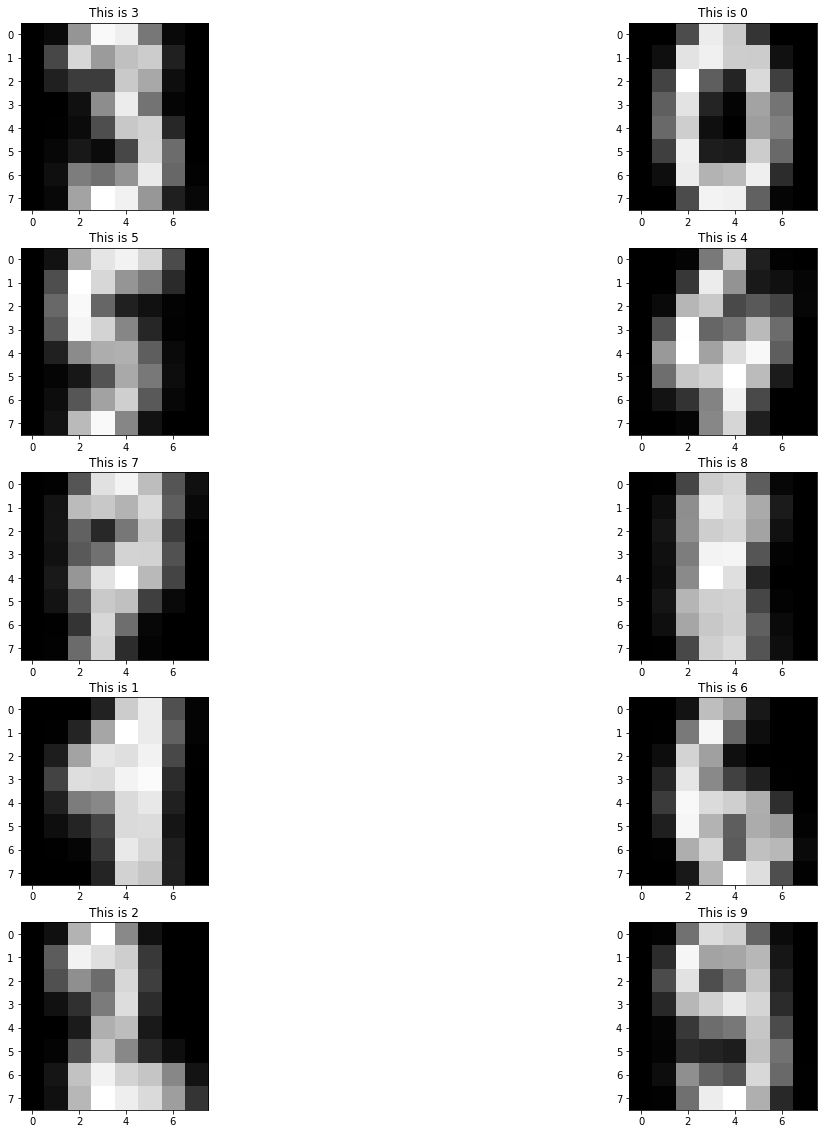

In [20]:
#TASK 1. KMeans clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from operator import itemgetter

digits=load_digits()
targets=digits.target
sample=np.array(digits.data)
kmeans=KMeans(n_clusters=10).fit(sample)

def get_labels(pts, centroids):    
    dist0=[np.linalg.norm(pts-centroids[i,:],axis=1).reshape(-1,1) for i in range(centroids.shape[0])] 
    res=np.argmin(np.hstack(dist0), axis=1)
    return res
labels=get_labels(sample,kmeans.cluster_centers_)
cluster=np.arange(10)
for i in range(10):
       cluster[i]=np.argmax(np.bincount(digits.target[labels==i]))
plt.figure(figsize=(20,20))
for k in range(10):
    plt.subplot(5,2,k+1)
    plt.imshow(np.array(kmeans.cluster_centers_[k]).reshape((8,8)),cmap='gray')
    plt.title('This is {}'.format(cluster[k]))

In [130]:
#task2. Error function
error=np.arange(10)
total=np.arange(0)
for i in range(10):
    print('error rate for {}'.format(cluster[i]),round(digits.target[labels==i][digits.target[labels==i]!=cluster[i]].shape[0]*100/digits.target[labels==i].shape[0],2),'%')
    total=np.append(total,digits.target[labels==i][digits.target[labels==i]!=cluster[i]])
print('')    
print('total rate is', round(total.shape[0]*100/digits.target.shape[0],2),'%')

error rate for 4 1.81 %
error rate for 2 15.43 %
error rate for 0 1.12 %
error rate for 8 54.87 %
error rate for 6 2.75 %
error rate for 7 14.08 %
error rate for 3 12.99 %
error rate for 9 43.72 %
error rate for 1 38.89 %
error rate for 5 8.72 %

total rate is 20.53 %


[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   7   0   0 163   1   0   6   4   0]
 [  0   0   0   2   2 130   1   0   0  47]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   1   0 174   4   0]
 [  0   5   3   2   0   6   2   3 100  53]
 [  0  20   0   7   0   6   0   7   2 138]]



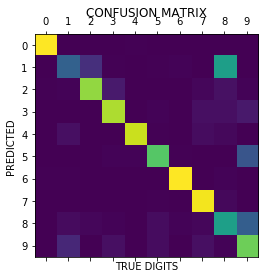

In [2]:
#task 3. Confusion matrix
import matplotlib
new_labels=np.array(labels)     
#new labels-массив,в котором new_labels[i]-это цифра, соответствующая превалирующему значению digits.target для элементов с фикс. значением label  
for i in range(labels.shape[0]):
    new_labels[i]=cluster[labels[i]]

m=np.array([[np.count_nonzero((new_labels==i)&(digits.target==j)) for i in range(10)] for j in range(10)])
print(m)
print('')

plt.matshow(m)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylim(top=-0.5,bottom=9.5)
plt.title('CONFUSION MATRIX')
plt.xlabel('TRUE DIGITS')
plt.ylabel('PREDICTED ')
plt.show()

Числа на диагонали матрицы ошибок соответствуют ситуации, когда наш прогноз оказался правильным. Чем больше число, тем лучше прогноз и тем мы имеем более желтый цвет на визуализации.Соответственно:
1) лучше всего предсказаны цифры 0,6,7.
2) хуже всего предсказаны цифры 1 и 8.

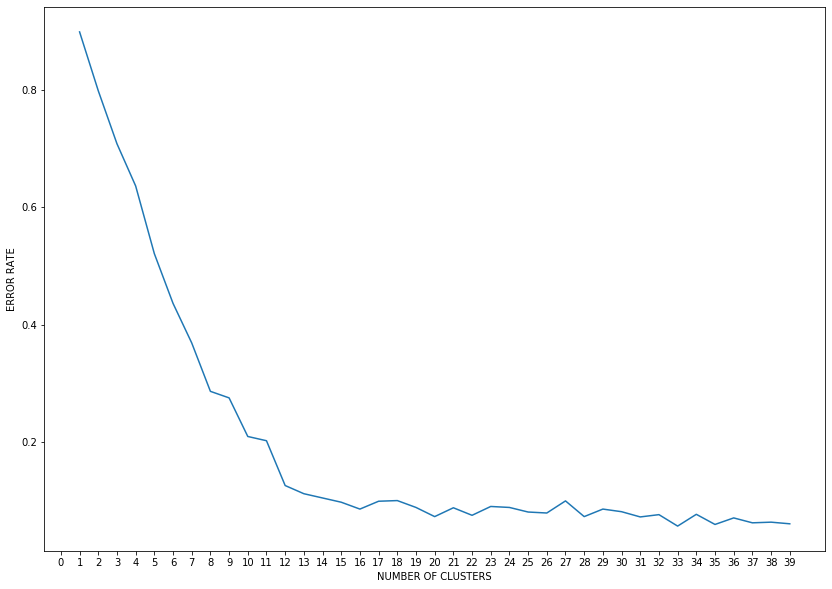

In [6]:
#task 4. Optimal k
def error_rate(k):
    total=np.arange(0)
    kmeans_total=KMeans(n_clusters=k).fit(sample)
    labels=get_labels(sample,kmeans_total.cluster_centers_)
    cluster=np.arange(k)
    for i in range(k):
        cluster[i]=np.argmax(np.bincount(digits.target[labels==i]))
    for i in range(k):
        total=np.append(total,digits.target[labels==i][digits.target[labels==i]!=cluster[i]])
    total=total.shape[0]/digits.target.shape[0]
    return total
totals=np.arange(1.0,40.0)
for j in range(1,40):
    totals[j-1]=error_rate(j)
#print(error_rate(19))
#print(totals)
#plt.xlabel('NUMBER OF CLUSTERS')
#plt.ylabel('ERROR RATE')
plt.figure(figsize=(14,10))
plt.plot(np.arange(1,40),totals)
plt.xticks(np.arange(40))
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('ERROR RATE')
plt.show()


оптимальное значение:k=16. Это первое значение k, при котором ошибка практически достигает минимального значения. При этом, значение k не очень большое, что обеспечивает не особо долгое время работы. К тому же, при больших k модель может оказаться слишком сложной и может случиться явление переобучения

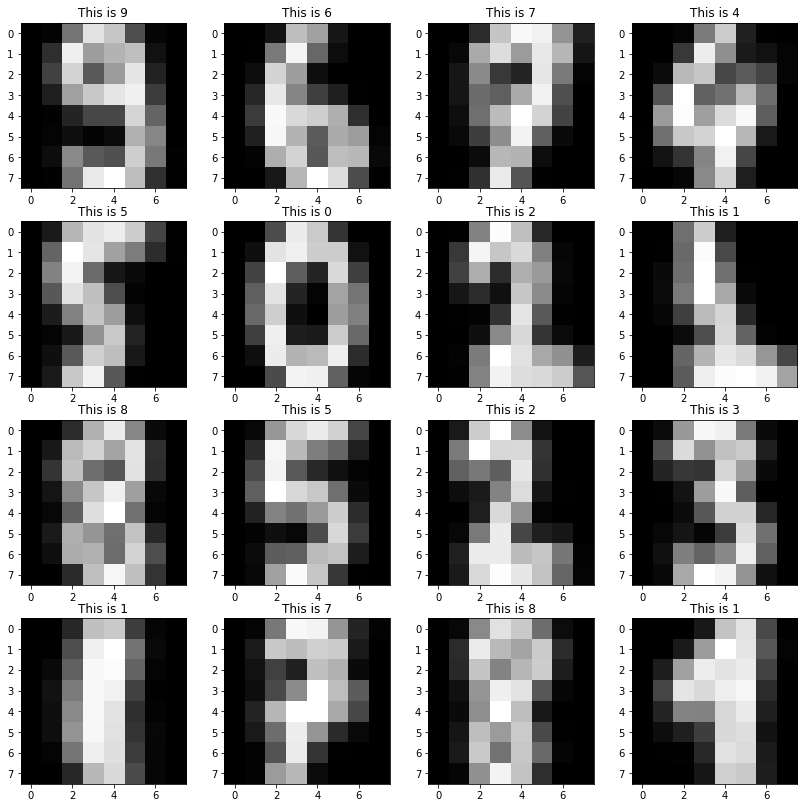

In [27]:
#task 5. Implementation with optimal k
kmeans_fin=KMeans(n_clusters=16).fit(sample)
labels=get_labels(sample,kmeans_fin.cluster_centers_)
cluster=np.arange(16)
for i in range(16):
    cluster[i]=np.argmax(np.bincount(digits.target[labels==i]))
plt.figure(figsize=(14,14))
for k in range(16):
    #plt.figure(figsize=(10,10))
    plt.subplot(4,4,k+1)
    plt.imshow(np.array(kmeans_fin.cluster_centers_[k]).reshape((8,8)),cmap='gray')
    plt.title('This is {}'.format(cluster[k]))

Один кластер для цифр:9,6,4,0,3,8
Большего одного кластера для цифр:7,5,2,1(аж три кластера),8

[[177   0   0   0   1   0   0   0   0   0]
 [  0 179   0   0   0   1   0   0   2   0]
 [  1   1 164   0   0   0   0   1  10   0]
 [  0   0   2 149   0   2   0   7  13  10]
 [  0  12   0   0 160   0   0   6   3   0]
 [  0   0   0   0   1 170   1   0   0  10]
 [  1   3   0   0   0   0 175   0   2   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  12   2   2   0   3   1   2 151   1]
 [  0  17   0   2   0   4   0  14   3 140]]



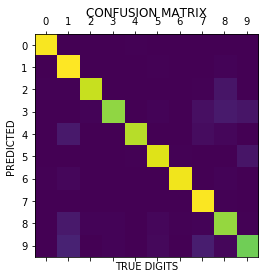

In [28]:
new_labels=np.array(labels)     
#new labels-массив,в котором new_labels[i]-это цифра, соответствующая превалирующему значению digits.target для элементов с фикс. значением label  
for i in range(labels.shape[0]):
    new_labels[i]=cluster[labels[i]]

m=np.array([[np.count_nonzero((new_labels==i)&(digits.target==j)) for i in range(10)] for j in range(10)])
print(m)
print('')

plt.matshow(m)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylim(top=-0.5,bottom=9.5)
plt.title('CONFUSION MATRIX')
plt.xlabel('TRUE DIGITS')
plt.ylabel('PREDICTED ')
plt.show()

получаем результаты лучше, т.к на диагонали цвет элементов в разы ближе к желтому, чем при k=10. Точность увеличилась, потому что, цифры разбились на большее количество подгрупп, внутри которых уже каждую цифру можно различить (например 1 и 8). 

#task 6 Upgrades
Точность зависит от того, как мы выбираем центроиды кластеров в самом начале. В обычном k-means мы делаем это рандомно. Но можно выбирать их следующим образом:
    1) 1 центроид выбираем рандомно
    2)далее действуем следующим образом: вероятность выбора точки как центроида следующих кластеров будет пропорциональна        квадрату расстояния до нее. Тогда не будет шансов, что координаты нового центроида совпадут с координатам уже существующих центроидов (такая вероятность будет 0). Так же, новые центроиды будут с большой вероятностью выбираться "достаточно" далеко от уже существующих центроидов, что даст более быструю сходимость.
    3) Когда мы выбрали все начальные центроиды кластеров производим наш обычный алгоритм k-means